# Lending Club Case Study


#### Problem Statement

The consumer finance company which specialises in lending various types of loans to urban customers.

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

The main objective to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

Perform an analysis to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company want to utilise this knowledge for its portfolio and risk assessment.  

We will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
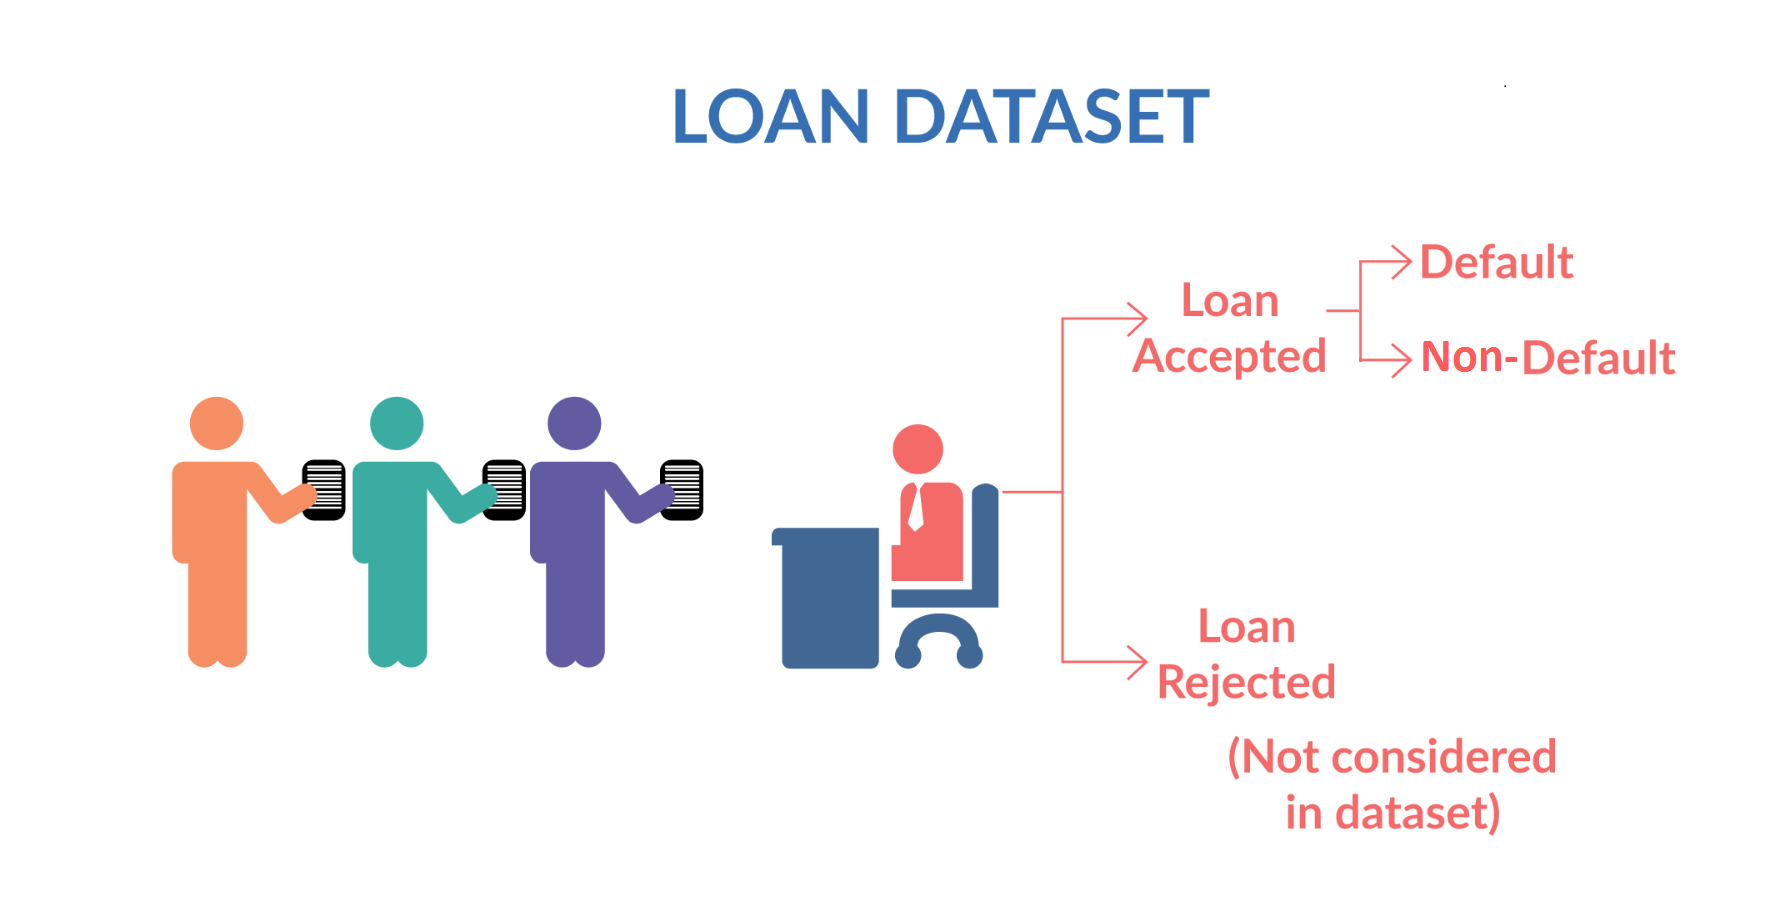


## Import Necessary Libraries

In [153]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Extra - To Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [215]:
#Read CSV file and check it's attributes.
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [216]:
#Check the shape of the loan data
loan.shape

(39717, 111)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [217]:
#Check the datatypes of all the columns of the the loan data

print(loan.info())

print(loan.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


#### Check for duplicate rows in dateset

In [218]:
dup = loan[loan.duplicated(['id'])]
dup

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### Missing Value Treatment

In [219]:
#Check how many rows have missing values
print('Number of empty Rows:')
loan.isnull().all(axis=1).sum()

Number of empty Rows:


0

In [220]:
#Check how many columns have missing values
print('Number of empty Columns:')
loan.isnull().all(axis=0).sum()

Number of empty Columns:


54

In [221]:
#Check the number of null values in the columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Handling missing values
 - drop columns where all values are null.

In [222]:
# Removeing columns with all null values
loan = loan.dropna(axis=1, how='all')
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [223]:
#Check the percentage of null values in the columns after dropping null values
100*loan.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [224]:
# Drop additional columns those have more than 30% null values
# Removing these columns will reduce impact on analysis and it will improve the accuracy of the analysis.
columns_drop_list = ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
loan.drop(labels = columns_drop_list, axis=1, inplace=True)

In [225]:
100*loan.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

### Analysis of colunms for single valued

In this data set some columns have single value and these columns will not contribute in EDA process. So, we would need to remove those columns from the data set.


In [226]:
# Get all single valued columns into an array.

single_valued_coulmns = []
for column in loan.columns:
    if (loan[column][0] == loan[column]).all():
        single_valued_coulmns.append(column)
print(single_valued_coulmns)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


Removing above columns because these columns are single valued columns.

In [227]:
# Removing above columns because these columns are single valued columns.

loan.drop(single_valued_coulmns, axis = 1, inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [228]:
#Checking for missing values across the rows
print((loan.isnull().sum(axis=1)).max())

5


The max number of missing values in rows are very low as compared to the number of remaining columns(47 columns after removing null irrelevant "valued and single values, etc." columns). So, we can ignore these values.

In [229]:
#Check remaining columns of the loan dataset.
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Removing the Irrelevent coumns

- To approve loan, we would need analyse the user details and the driving factors of the loan defaulting
- We can remove these columns as these are not needed in loan analysis: "id", "member_id", "emp_title", "url","title", "zip_code", "addr_state".
- Removing "funded_amnt_inv" column because it is for internal uses.

#### List of Post-Approval dimentions

- 'delinq_2yrs'
- 'earliest_cr_line'
- 'inq_last_6mths'
- 'open_acc', 'pub_rec'
- 'revol_bal'
- 'revol_util'
- 'total_acc'
- 'out_prncp'
- 'out_prncp_inv'
- 'total_pymnt'
- 'total_pymnt_inv'
- 'total_rec_prncp'
- 'total_rec_int'
- 'total_rec_late_fee'
- 'recoveries'
- 'collection_recovery_fee'
- 'last_pymnt_d'
- 'last_pymnt_amnt'
- 'last_credit_pull_d'
- 'collections_12_mths_ex_med'
- 'chargeoff_within_12_mths'
- 'tax_liens'

In [230]:
# Removing columns those are calculated after loan. So, these columns are irrelevant for analysis.
columns_after_loan_cal = ['installment', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                          'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                          'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'funded_amnt_inv',
                         'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan.drop(columns_after_loan_cal, axis = 1, inplace = True)
coulmns_user_personal = ["id", "member_id", "emp_title", "url","title", "zip_code", "addr_state"]
loan.drop(coulmns_user_personal, axis = 1, inplace = True)
loan.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,2500,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,2400,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,10000,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
4,3000,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0


In [231]:
loan.shape

(39717, 15)

In [232]:
#Check remaining columns of the loan dataset.
loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

### Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [233]:
#Check the percentage of null values in the columns
100*loan.isnull().mean()

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

#### Handling Missing values

- Columns with missing values are "emp_length" and "pub_rec_bankruptcies"


In [234]:
loan[['emp_length','pub_rec_bankruptcies']].isnull().sum()

emp_length              1075
pub_rec_bankruptcies     697
dtype: int64

In [235]:
# Checking values of 'emp_length' to impute value for null values
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

As we know the 'emp_length' is integer type data, so we can impute median/mode of the 'emp_length' column for null values. 

In [236]:
# We will use mode function to impute data in 'emp_length' because this column have categorical data.
mod = loan['emp_length'].mode()[0]
loan['emp_length']=loan['emp_length'].fillna(mod)
loan['emp_length'].isna().sum()

0

In [237]:
# Checking values of 'pub_rec_bankruptcies' to impute value for null values
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

As we can see above that 'pub_rec_bankruptcies' column have most of the value as 0. So, we will replace null values with 0 in this column.

In [238]:
# Inserting 0 for null values in 'pub_rec_bankruptcies' column
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(0)
loan['pub_rec_bankruptcies'].isna().sum()

0

In [239]:
#Check the percentage of null values in the columns
100*loan.isnull().mean()

loan_amnt               0.0
funded_amnt             0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

Now we don't have any missing values in all remaining columns. So, we can proceed further for next steps.

### Standardising Values in required columns

In [240]:
#View data types of all columns
print(loan)
print(loan.info())

       loan_amnt  funded_amnt        term int_rate grade sub_grade emp_length  \
0           5000         5000   36 months   10.65%     B        B2  10+ years   
1           2500         2500   60 months   15.27%     C        C4   < 1 year   
2           2400         2400   36 months   15.96%     C        C5  10+ years   
3          10000        10000   36 months   13.49%     C        C1  10+ years   
4           3000         3000   60 months   12.69%     B        B5     1 year   
...          ...          ...         ...      ...   ...       ...        ...   
39712       2500         2500   36 months    8.07%     A        A4    4 years   
39713       8500         8500   36 months   10.28%     C        C1    3 years   
39714       5000         5000   36 months    8.07%     A        A4   < 1 year   
39715       5000         5000   36 months    7.43%     A        A2   < 1 year   
39716       7500         7500   36 months   13.75%     E        E2   < 1 year   

      home_ownership  annua

In [241]:
# Let's remove % symbol from 'int_rate' column and convert it's data type into float so that it can be used in calculations
loan['int_rate'] = loan['int_rate'].apply(lambda x:x[:-1]).astype(float)

# Let's remove 'months' from 'term' column and convert it's data type into int so that it can be used in calculations
loan['term'] = loan['term'].apply(lambda x:x.replace(' months', '')).astype(int)

# Let's reformat 'emp_length' column, if value is < 1 year then make it to 0 and 10+ then make it to 10.
loan['emp_length'] = loan['emp_length'].apply(lambda x: 0 if '<' in x else (x.split('+')[0] if '+' in x else x.split()[0])).astype(int)

print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   term                  39717 non-null  int64  
 3   int_rate              39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            39717 non-null  int64  
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  pub_rec_bankruptcies  39717 non-null  float64
dtypes: float64(4), int6

### Remove row with 'current' value in loan_status column
In this case study, we are analysing about completed and defaulted loans, so we would need to remove rows having 'loan_status' as 'current'.


In [242]:
#Remove rows with 'Current' value for 'loan_status'
loan = loan[loan['loan_status'] != 'Current']

#Show shape of loan data 
print(loan.shape)

(38577, 15)


### Treatment of data type of necessary columns

In [243]:
# Convert data type of 'grade', 'sub_grade', 'home_ownership', 'verification_status', 
# 'loan_status' and 'purpose' columns from object to category
loan['grade'] = loan['grade'].astype('category')
loan['sub_grade'] = loan['sub_grade'].astype('category')
loan['home_ownership'] = loan['home_ownership'].astype('category')
loan['verification_status'] = loan['verification_status'].astype('category')
loan['loan_status'] = loan['loan_status'].astype('category')
loan['purpose'] = loan['purpose'].astype('category')

# Convert data type of 'issue_d' to datetime 
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   term                  38577 non-null  int64         
 3   int_rate              38577 non-null  float64       
 4   grade                 38577 non-null  category      
 5   sub_grade             38577 non-null  category      
 6   emp_length            38577 non-null  int64         
 7   home_ownership        38577 non-null  category      
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  category      
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  category      
 12  purpose               38577 non-null  category      
 13  dti             

In [244]:
# Setting 2 decimal point limit for all numerical data columns
for column in loan.columns:
    if loan[column].dtype == 'float64':
        loan[column] = loan[column].round(2)
loan.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.0
1,2500,2500,60,15.27,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0.0
2,2400,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0.0
3,10000,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0.0
5,5000,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0.0


### Deriving new columns for Analysis

In [245]:
#Deriving new columns from 'issue_d' as 'issue_month' and 'issue_year'
loan['issue_month'] = loan['issue_d'].dt.month
loan['issue_year'] = loan['issue_d'].dt.year
loan.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.0,12,2011
1,2500,2500,60,15.27,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0.0,12,2011
2,2400,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0.0,12,2011
3,10000,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0.0,12,2011
5,5000,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0.0,12,2011


In [246]:
# Selecting columns based on domain knowledge
# Required columns are 'loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'purpose',
# 'issue_year', 'issue_month', 'term', 'grade', 'sub_grade','emp_length',  'home_ownership', 'verification_status'
loan = loan[['loan_amnt', 'term','int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'pub_rec_bankruptcies', 'issue_month', 'issue_year']]
print(loan.shape)

(38577, 15)


In [247]:
# Categories columns based on Numerical, Categorical and extra

num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']
cat_cols = ['term', 'grade', 'sub_grade','emp_length',  'home_ownership', 'verification_status', 'purpose']
ext_cols = ['loan_status']

### Outliers Analysis Using Boxplot

Now we need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where we’ll start utilising visualisation to achieve our tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable.

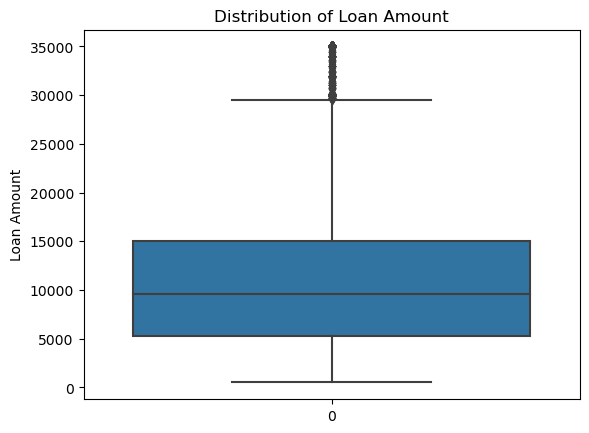

In [248]:
#Create a box plot for the loan_amnt
plt.title('Distribution of Loan Amount')

# ylabel
plt.ylabel('Loan Amount')

sns.boxplot(loan['loan_amnt'])
plt.show()

In [251]:
# Boxplot of 'loan_amnt' column shows that there are outliers out of upper fence. So, we need to remove these outliers.

print('Before Removal of Outliers: \n')
print(loan['loan_amnt'].describe())


# Remove Outliers quantile .99 from Loan Amount
loan = loan[loan['loan_amnt'] < loan['loan_amnt'].quantile(0.99)]

print('\n After Removal of Outliers: \n')
print(loan['loan_amnt'].describe())

Before Removal of Outliers: 

count    37976.000000
mean     10667.950811
std       6755.020203
min        500.000000
25%       5100.000000
50%       9600.000000
75%      15000.000000
max      34800.000000
Name: loan_amnt, dtype: float64

 After Removal of Outliers: 

count    37505.000000
mean     10416.340488
std       6409.219395
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      29900.000000
Name: loan_amnt, dtype: float64


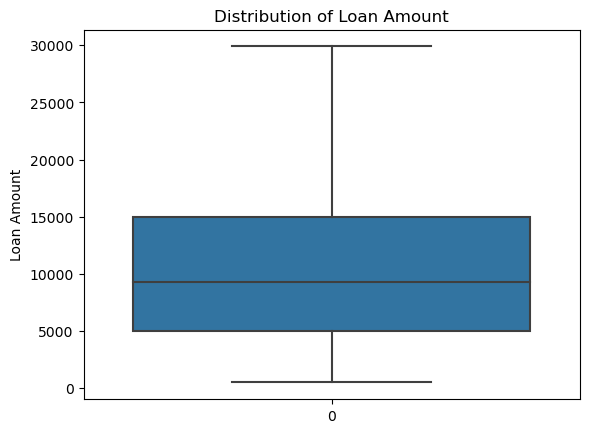

In [252]:
plt.title('Distribution of Loan Amount')

# ylabel
plt.ylabel('Loan Amount')

sns.boxplot(loan['loan_amnt'])
plt.show()

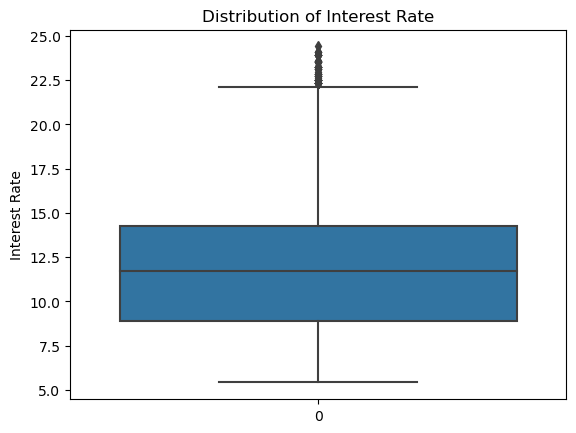

In [253]:
#Create a box plot for the int_rate
plt.title('Distribution of Interest Rate')

# ylabel
plt.ylabel('Interest Rate')

sns.boxplot(loan['int_rate'])
plt.show()

In [254]:
# Boxplot of 'int_rate' column shows that there are outliers out of upper fence. So, we need to remove these outliers.

print('Before Removal of Outliers: \n')
print(loan['int_rate'].describe())


# Remove Outliers quantile .99 from Loan Amount
loan = loan[loan['int_rate'] < loan['int_rate'].quantile(0.99)]

print('\n After Removal of Outliers: \n')
print(loan['int_rate'].describe())

Before Removal of Outliers: 

count    37505.000000
mean        11.822201
std          3.620749
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

 After Removal of Outliers: 

count    37129.000000
mean        11.722891
std          3.500351
min          5.420000
25%          8.900000
50%         11.660000
75%         14.220000
max         20.620000
Name: int_rate, dtype: float64


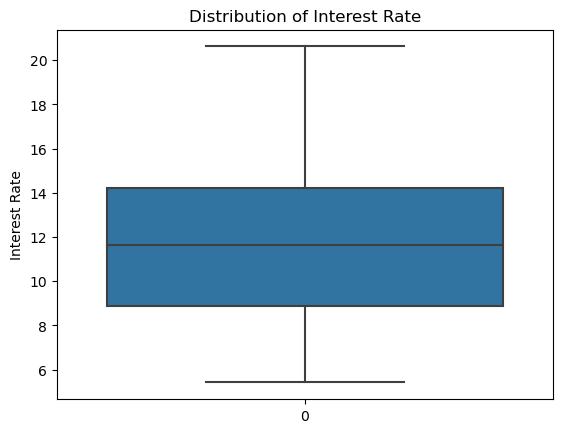

In [255]:
plt.title('Distribution of Interest Rate')

# ylabel
plt.ylabel('Interest Rate')

sns.boxplot(loan['int_rate'])
plt.show()

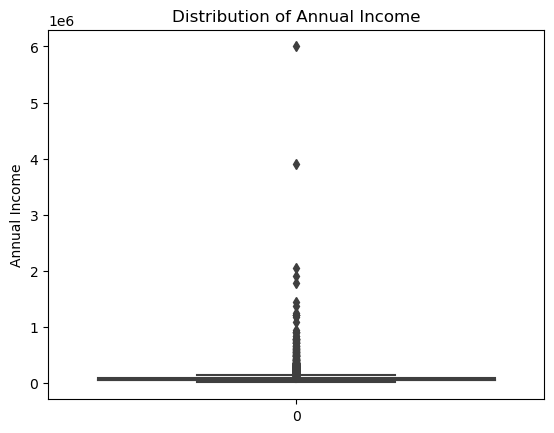

In [256]:
#Create a box plot for the annual_inc
plt.title('Distribution of Annual Income')

# ylabel
plt.ylabel('Annual Income')

sns.boxplot(loan['annual_inc'])
plt.show()

In [257]:
# Boxplot of 'annual_inc' column shows that there are outliers out of upper fence. So, we need to remove these outliers.

print('Before Removal of Outliers: \n')
print(loan['annual_inc'].describe())


# Remove Outliers quantile .99 from Loan Amount
loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.99)]

print('\n After Removal of Outliers: \n')
print(loan['annual_inc'].describe())

Before Removal of Outliers: 

count    3.712900e+04
mean     6.698769e+04
std      6.301818e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.700000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

 After Removal of Outliers: 

count     36754.000000
mean      63690.925135
std       33469.392906
min        4000.000000
25%       40000.000000
50%       56500.000000
75%       80000.000000
max      215662.000000
Name: annual_inc, dtype: float64


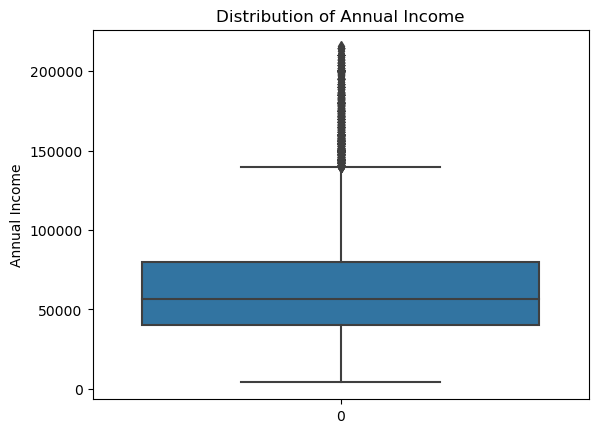

In [258]:
plt.title('Distribution of Annual Income')

# ylabel
plt.ylabel('Annual Income')

sns.boxplot(loan['annual_inc'])
plt.show()

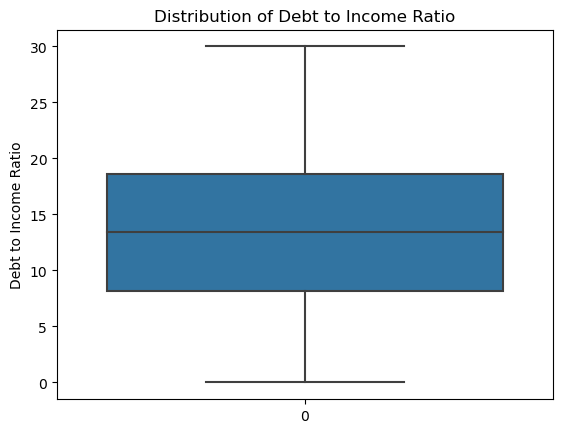

In [259]:
#Create a box plot for the dti
plt.title('Distribution of Debt to Income Ratio')

# ylabel
plt.ylabel('Debt to Income Ratio')

sns.boxplot(loan['dti'])
plt.show()

# Boxplot show that there is not outliers in 'dti' column. 

###### Now the data has been cleaned and all Outliers are removed. So we can proceed with the analysis.

## Univariate Analysis

### Analysis of Loan Status

Loan status
Fully Paid Loans: 85.90085432878054
Charged Off Loans: 14.09914567121946


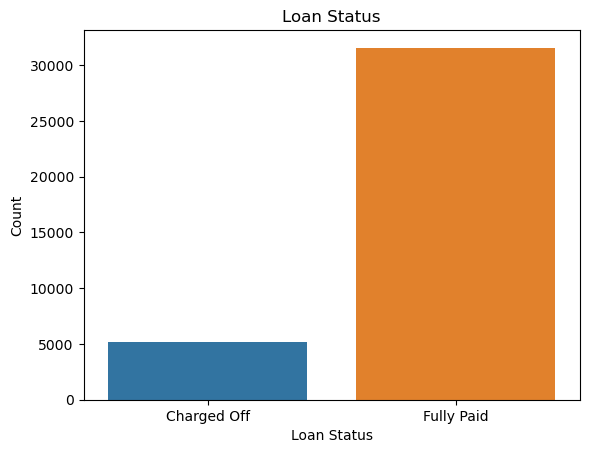

In [279]:
# Loan status
print("Loan status")
print(f"Fully Paid Loans: {len(loan[loan['loan_status'] == 'Fully Paid'])/len(loan['loan_status'])*100}")
print(f"Charged Off Loans: {len(loan[loan['loan_status'] == 'Charged Off'])/len(loan['loan_status'])*100}")

ls = sns.countplot(x = 'loan_status', data = loan)
ls.set_title('Loan Status')
ls.set_xlabel('Loan Status')
ls.set_ylabel('Count')
plt.show()

##### Analysis shows that 85.90 % loans are fully paid and 14.09 % loans are charged off. It means defaulted loans are lower than fully paid lons.

### Analysis of Loan Terms

Loan Terms
36 months: 77.45279425368668
60 months: 22.547205746313324


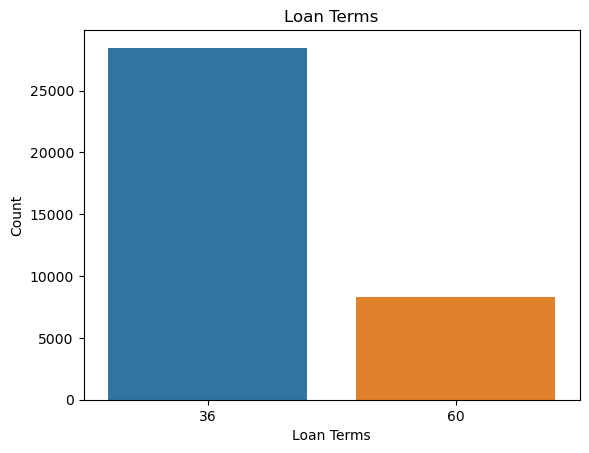

In [280]:
# Loan status
print("Loan Terms")
print(f"36 months: {len(loan[loan['term'] == 36])/len(loan['term'])*100}")
print(f"60 months: {len(loan[loan['term'] == 60])/len(loan['term'])*100}")

ls = sns.countplot(x = 'term', data = loan)
ls.set_title('Loan Terms')
ls.set_xlabel('Loan Terms')
ls.set_ylabel('Count')
plt.show()

##### Analysis shows that 77.45 % loan terms are 36 months and 22.54 % loan terms are 60 months. It means people taking shorter loans than long duration loans.

### Analysis of Loan Grade

Loan Grade


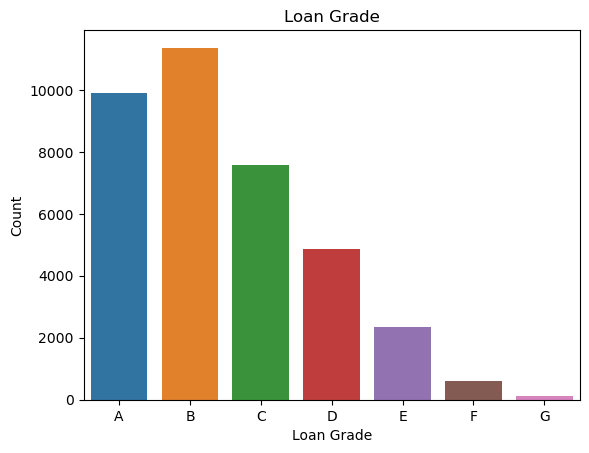

In [283]:
# Loan Grade
ls = sns.countplot(x = 'grade', data = loan)
ls.set_title('Loan Grade')
ls.set_xlabel('Loan Grade')
ls.set_ylabel('Count')
plt.show()

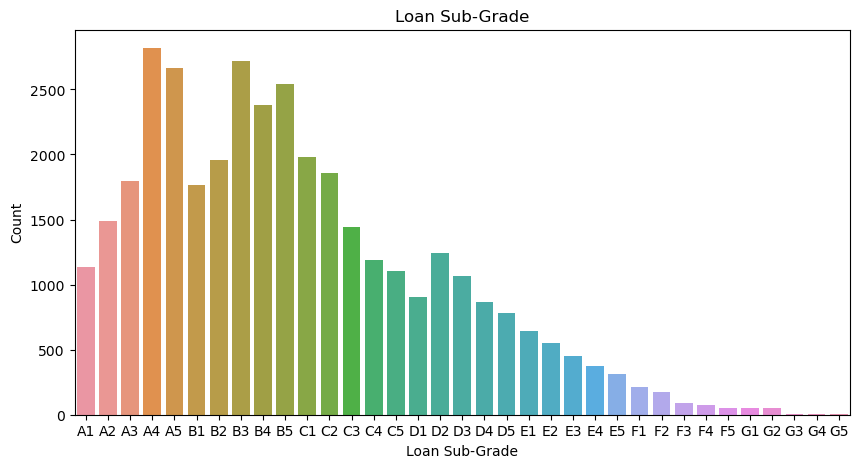

In [286]:
# Loan Sub-Grade
plt.figure(figsize= [10,5])
ls = sns.countplot(x = 'sub_grade', data = loan)
ls.set_title('Loan Sub-Grade')
ls.set_xlabel('Loan Sub-Grade')
ls.set_ylabel('Count')
plt.show()

##### Analysis of Grade and Sub-Grade shows that most of the loans are with grade A and B grades. It means people taking higher grade loans.

### Analysis of Loan Interest Rate

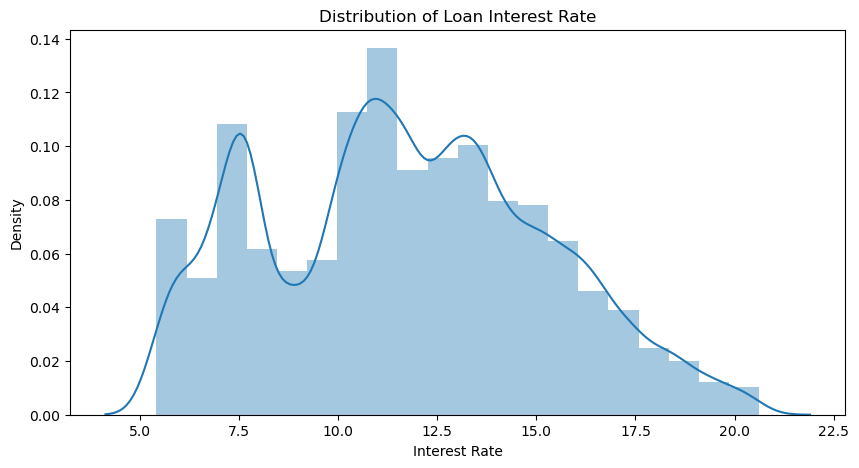

In [297]:
# Loan Interest Rate
plt.figure(figsize= [10,5])
ls = sns.distplot(loan['int_rate'], kde=True, bins=20)
ls.set_title('Distribution of Loan Interest Rate')
ls.set_xlabel('Interest Rate')
ls.set_ylabel('Density')
plt.show()

##### Analysis of Interest Rate shows that People have taken most of loan with 5 to 7.5 and 10 to 15 percent Interest Rate.  

### Analysis of Employment Lenght

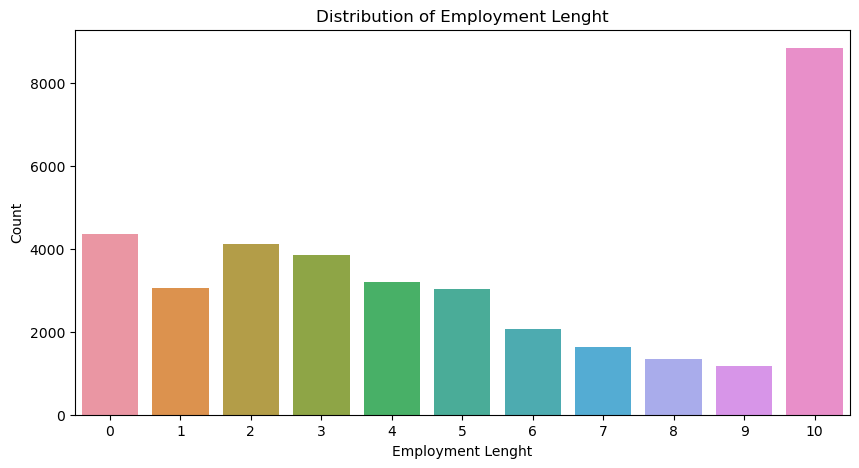

In [303]:
# Employment Lenght
plt.figure(figsize= [10,5])
ls = sns.countplot(x='emp_length', data=loan)
ls.set_title('Distribution of Employment Lenght')
ls.set_xlabel('Employment Lenght')
ls.set_ylabel('Count')
plt.show()

##### Analysis of Employment Lenght shows that People are mostly belongs to 10 years of employment. It shows that these people are most capable to take loans.  

### Analysis of Annual Income

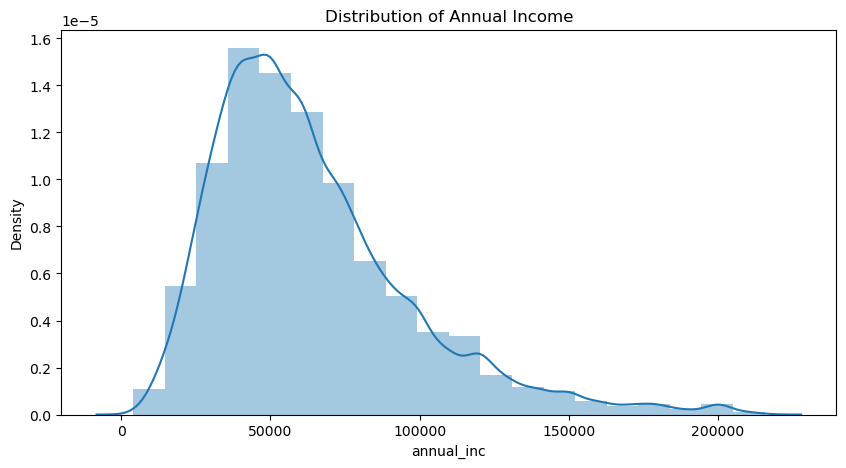

In [305]:
# Employment Lenght
plt.figure(figsize= [10,5])
ls = sns.distplot(loan['annual_inc'], kde=True, bins=20)
ls.set_title('Distribution of Annual Income')
# ls.set_xlabel('Employment Lenght')
# ls.set_ylabel('Count')
plt.show()

##### Analysis of Annual Income shows that loans are taken by mostly lower income group people.  It is showing left skew distribution in the graph.

### Analysis of Home Ownership

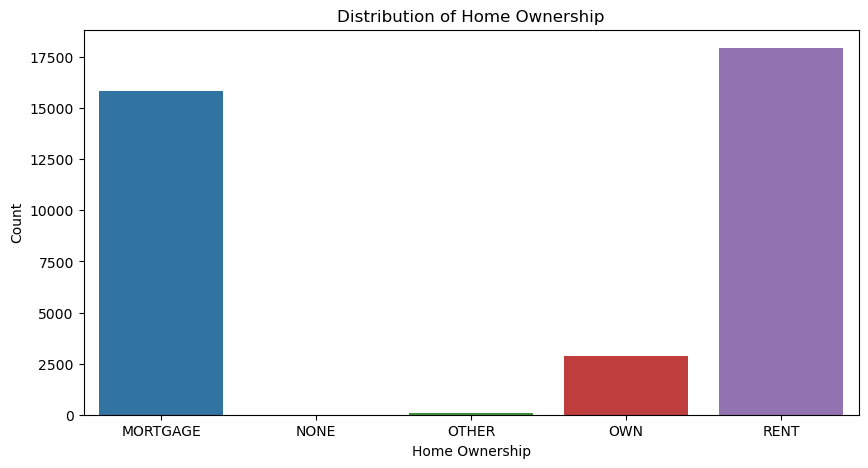

In [308]:
# Home Ownership
plt.figure(figsize= [10,5])
ls = sns.countplot(x='home_ownership', data=loan)
ls.set_title('Distribution of Home Ownership')
ls.set_xlabel('Home Ownership')
ls.set_ylabel('Count')
plt.show()

##### Analysis of Home Ownership: Most of the people don't own Home, They are on Mortgage or Rent.

### Analysis of Verification Status

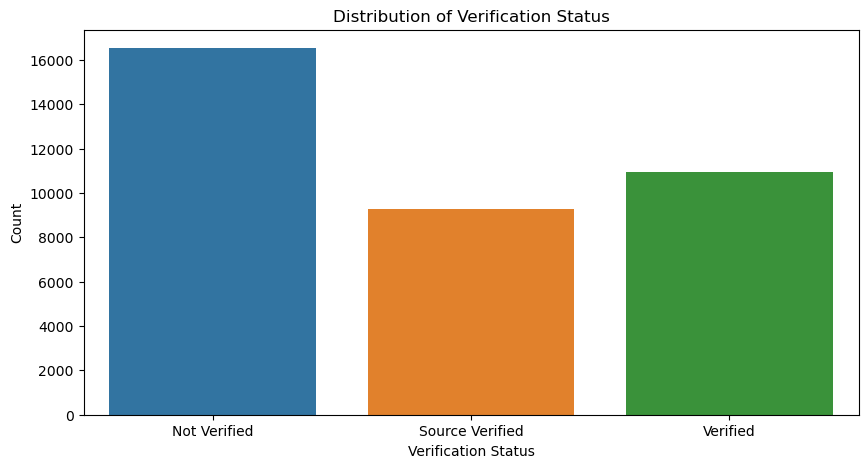

In [320]:
# Verification Status
plt.figure(figsize= [10,5])
ls = sns.countplot(x='verification_status', data=loan)
ls.set_title('Distribution of Verification Status')
ls.set_xlabel('Verification Status')
ls.set_ylabel('Count')
plt.show()

##### Analysis of Verification Status: 50 % of people are verified by lending company or source verified.

### Analysis of Loan Purpose

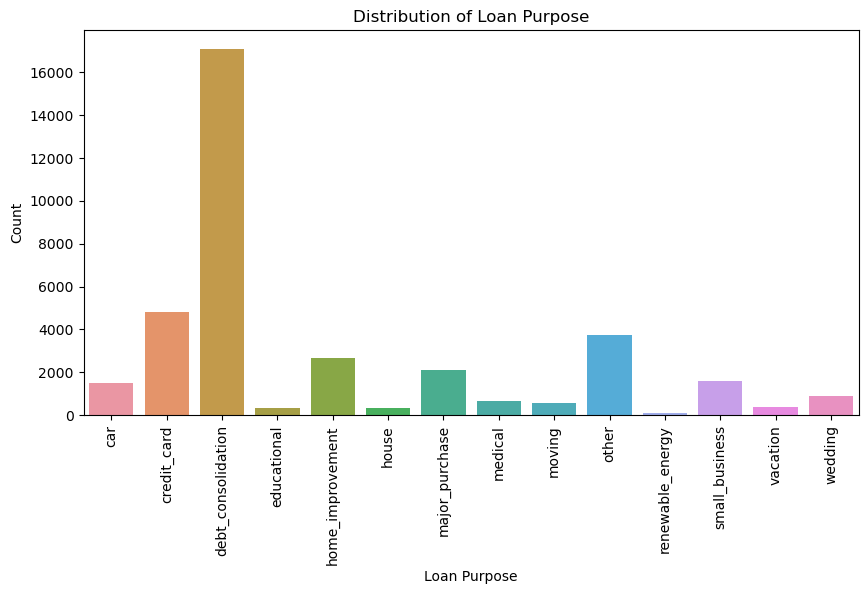

In [329]:
# Loan Purpose
plt.figure(figsize= [10,5])
ls = sns.countplot(x='purpose', data=loan)
ls.set_title('Distribution of Loan Purpose')
ls.set_xlabel('Loan Purpose')
ls.set_ylabel('Count')
plt.xticks(rotation=90);
plt.show()

##### Analysis of Loan Purpose: Most of people are taking loan for either credit card and dept consolidation.

### Analysis of Public Record for Bankruptcies

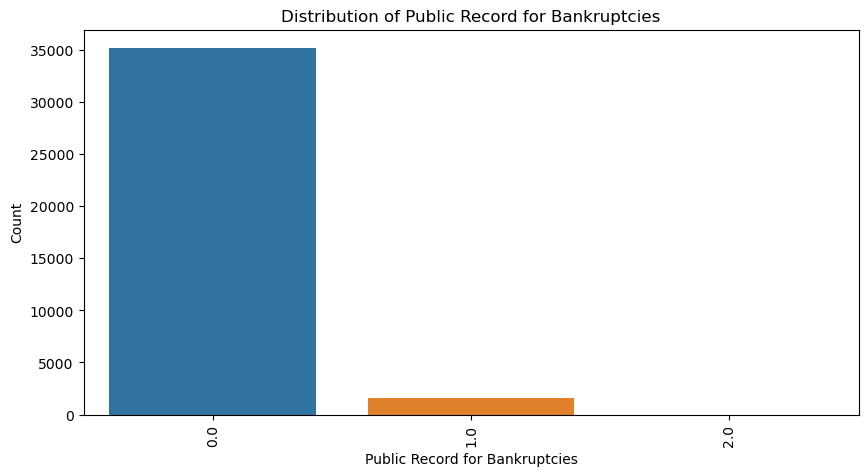

In [330]:
# Public Record for Bankruptcies
plt.figure(figsize= [10,5])
ls = sns.countplot(x='pub_rec_bankruptcies', data=loan)
ls.set_title('Distribution of Public Record for Bankruptcies')
ls.set_xlabel('Public Record for Bankruptcies')
ls.set_ylabel('Count')
plt.xticks(rotation=90);
plt.show()

##### Analysis of Public Record for Bankruptcies: Majority of the people don't have any public record for Bankruptcy.

### Analysis of DTI

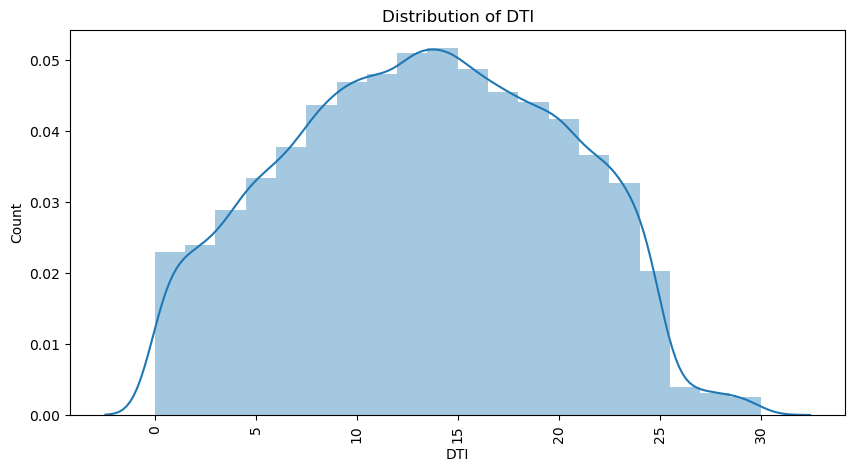

In [326]:
# DTI
plt.figure(figsize= [10,5])
ls = sns.distplot(loan['dti'], kde=True, bins=20)
ls.set_title('Distribution of DTI')
ls.set_xlabel('DTI')
ls.set_ylabel('Count')
plt.xticks(rotation=90);
plt.show()

##### Analysis of DTI Ratio: Majority of the people have very large dept compared to their income. Mostly having 8 to 22 DTI ratio.

### Analysis of Issueing Month

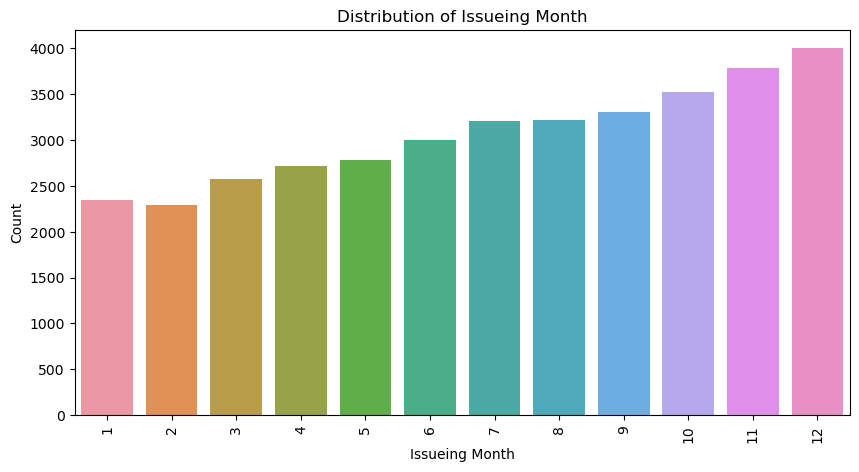

In [327]:
# Issueing Month
plt.figure(figsize= [10,5])
ls = sns.countplot(x='issue_month', data=loan)
ls.set_title('Distribution of Issueing Month')
ls.set_xlabel('Issueing Month')
ls.set_ylabel('Count')
plt.xticks(rotation=90);
plt.show()

##### Analysis of Issueing Month: It is showing that loan count is increasing towards year ends. As year progress, loan counts increase in every month compare to last month.

### Analysis of Issueing Year

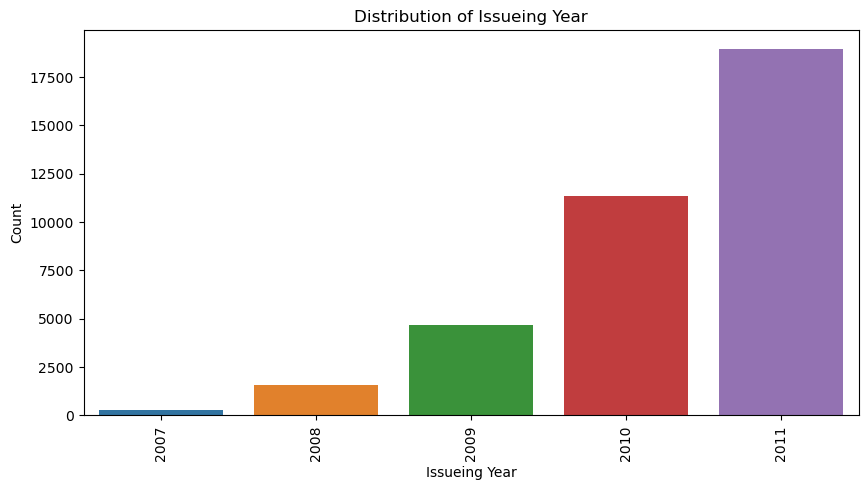

In [328]:
# Issueing Year
plt.figure(figsize= [10,5])
ls = sns.countplot(x='issue_year', data=loan)
ls.set_title('Distribution of Issueing Year')
ls.set_xlabel('Issueing Year')
ls.set_ylabel('Count')
plt.xticks(rotation=90);
plt.show()

##### Analysis of Issueing Year: It is showing that loan approval increasing exponential rate. Increasing every year compare to previous year.